<a href="https://colab.research.google.com/github/GURUPRASAD120303/Data-Science/blob/main/Predicting_House_Prices_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting House Prices Using Machine Learning!**

**Data Collection**

In [28]:
import pandas as pd
import numpy as np

# Generate synthetic data
np.random.seed(42)
size = np.random.randint(1000, 3500, 100)
bedrooms = np.random.randint(1, 6, 100)
age = np.random.randint(0, 30, 100)
price = (size * 300) + (bedrooms * 10000) - (age * 2000) + np.random.randint(10000, 50000, 100)


In [31]:
# Create DataFrame
df = pd.DataFrame({
    'Size (sq ft)': size,
    'Number of Bedrooms': bedrooms,
    'Age (years)': age,
    'Price ($)': price
})

print(df.head())


   Size (sq ft)  Number of Bedrooms  Age (years)  Price ($)
0          1860                   2            8     605986
1          2294                   1           27     675080
2          2130                   5           26     651735
3          2095                   3            5     663055
4          2638                   4           15     831230


**Data Cleaning**

In [32]:
df.shape

(100, 4)

In [33]:
df.isnull().sum()

Size (sq ft)          0
Number of Bedrooms    0
Age (years)           0
Price ($)             0
dtype: int64

In [34]:
df.fillna(df.mean())

,Size (sq ft),Number of Bedrooms,Age (years),Price ($)
0,1860,2,8,605986
1,2294,1,27,675080
2,2130,5,26,651735
3,2095,3,5,663055
4,2638,4,15,831230
...,...,...,...,...
95,3088,5,20,950542
96,3182,4,15,989802
97,1200,2,19,391734
98,2863,3,23,859979


In [35]:
df.dtypes

Size (sq ft)          int64
Number of Bedrooms    int64
Age (years)           int64
Price ($)             int64
dtype: object

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df

,Size (sq ft),Number of Bedrooms,Age (years),Price ($)
0,1860,2,8,605986
1,2294,1,27,675080
2,2130,5,26,651735
3,2095,3,5,663055
4,2638,4,15,831230
...,...,...,...,...
95,3088,5,20,950542
96,3182,4,15,989802
97,1200,2,19,391734
98,2863,3,23,859979


**Data Exploration and Analysis**

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df.describe()

,Size (sq ft),Number of Bedrooms,Age (years),Price ($)
count,100.000000,100.000000,100.000000,1.000000e+02
mean,2303.240000,2.900000,14.290000,7.199694e+05
std,721.603827,1.431958,9.310898,2.189686e+05
min,1021.000000,1.000000,0.000000,2.947380e+05
25%,1759.000000,1.750000,6.000000,5.461868e+05
50%,2271.000000,3.000000,15.000000,7.032030e+05
75%,3030.500000,4.000000,23.000000,9.247105e+05
max,3449.000000,5.000000,29.000000,1.072406e+06


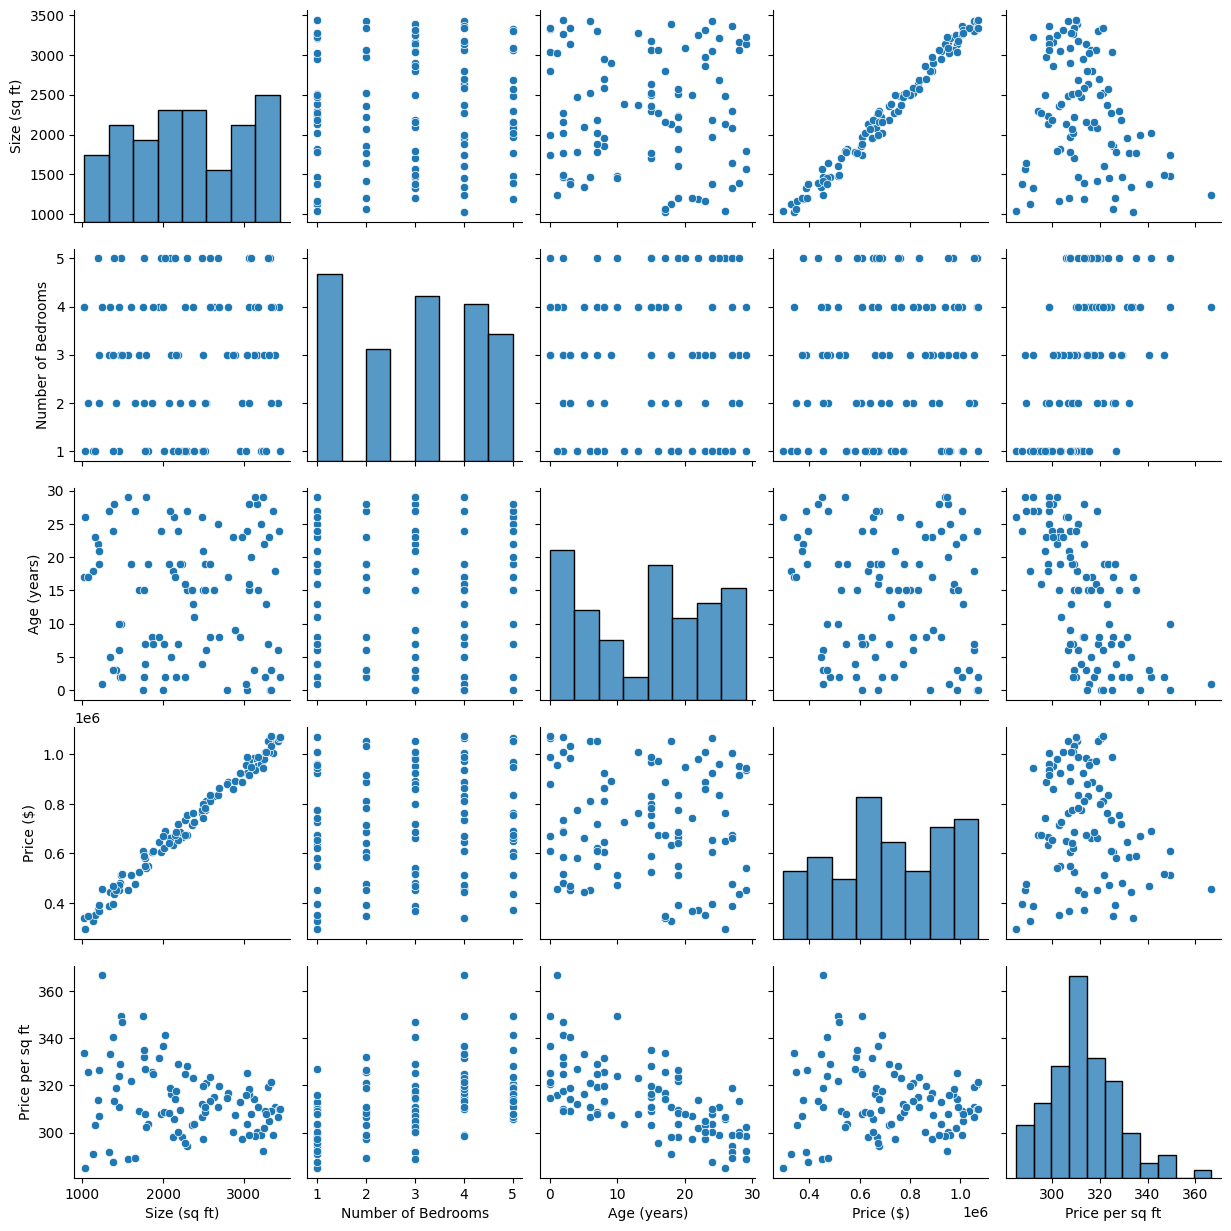

In [60]:
sns.pairplot(df)
plt.show()

**Feature Engineering**

In [41]:
df['Price per sq ft'] = df['Price ($)'] / df['Size (sq ft)']
print(df)

    Size (sq ft)  Number of Bedrooms  Age (years)  Price ($)  Price per sq ft
0           1860                   2            8     605986       325.798925
1           2294                   1           27     675080       294.280732
2           2130                   5           26     651735       305.978873
3           2095                   3            5     663055       316.494033
4           2638                   4           15     831230       315.098560
..           ...                 ...          ...        ...              ...
95          3088                   5           20     950542       307.818005
96          3182                   4           15     989802       311.062854
97          1200                   2           19     391734       326.445000
98          2863                   3           23     859979       300.376877
99          1779                   1            7     547687       307.862282

[100 rows x 5 columns]


**Model Training**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
# Features and target variable
X = df[['Size (sq ft)', 'Number of Bedrooms', 'Age (years)']]
y = df['Price ($)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Model Evaluation**

In [44]:
from sklearn.metrics import mean_absolute_error, r2_score

In [45]:
# Predictions
y_pred = model.predict(X_test)


In [46]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'R-squared: {r2}')

MAE: 11018.077827551364
R-squared: 0.9967949346528381


**Model Tuning**

Best parameters: {'poly_features__degree': 2, 'ridge__alpha': 0.1}
Best score: 10930.723694113247
MAE: 12618.018201816938
R-squared: 0.9957257121404413


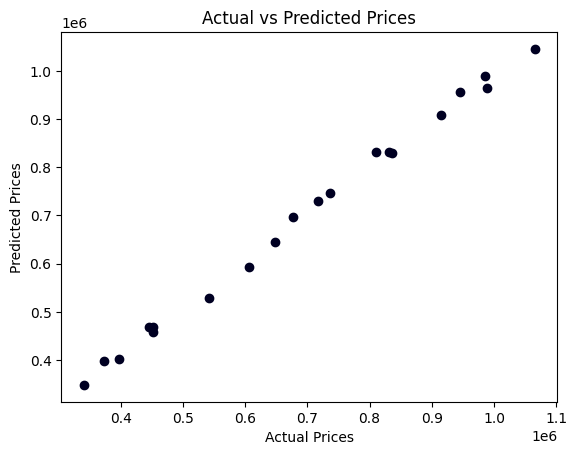

In [73]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('ridge', Ridge(max_iter=10000))
])

# Define the parameter grid
param_grid = {
    'poly_features__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 1.0, 10.0]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'R-squared: {r2}')

# Visualization
plt.scatter(y_test, y_pred, color = '#002')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


Best parameters (Lasso): {'lasso__alpha': 10.0, 'poly_features__degree': 2}
Best score (Lasso): 10916.9022445155
MAE (Lasso): 12520.029080892156
R-squared (Lasso): 0.9958060572430237


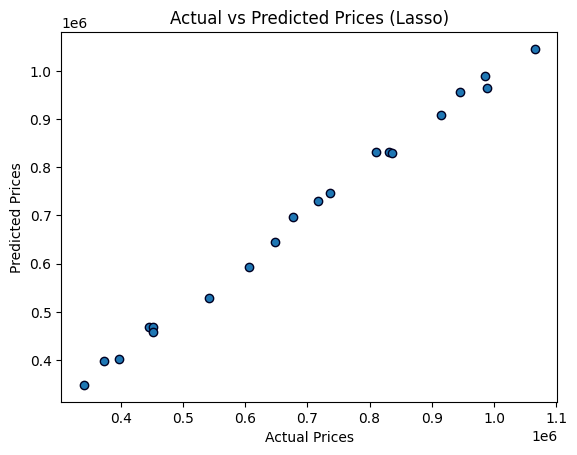

In [75]:
# Define the pipeline for Lasso regression
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('lasso', Lasso(max_iter=10000))
])

# Define the parameter grid
param_grid_lasso = {
    'poly_features__degree': [1, 2, 3],
    'lasso__alpha': [0.1, 1.0, 10.0]
}

# Perform grid search
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=5, scoring='neg_mean_absolute_error')
grid_search_lasso.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters (Lasso):", grid_search_lasso.best_params_)
print("Best score (Lasso):", -grid_search_lasso.best_score_)

# Evaluate the best Lasso model on the test set
best_model_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_model_lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'MAE (Lasso): {mae_lasso}')
print(f'R-squared (Lasso): {r2_lasso}')

# Visualization
plt.scatter(y_test, y_pred_lasso , edgecolors= '#002')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Lasso)')
plt.show()


**Model Deployment**

In [49]:
import joblib

# Train the model (assuming this code is run after the previous training steps)
best_model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(best_model, 'house_price_model.pkl')


['house_price_model.pkl']

**Communication and Reporting**

Linear Regression Model
Mean Absolute Error: 12020.893657813565
R-squared: 0.9959519831505039


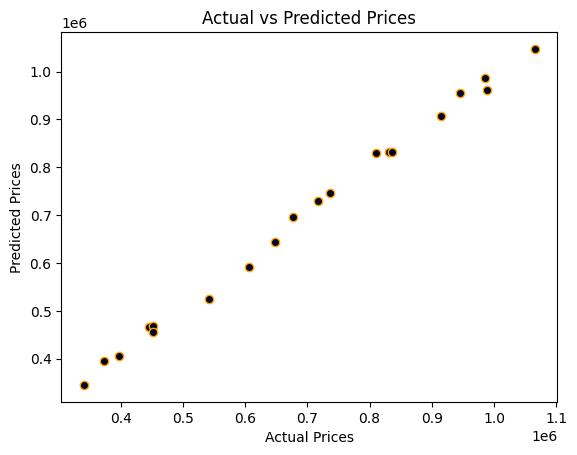

In [65]:
# Report summary
print("Linear Regression Model")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Visualization
plt.scatter(y_test, y_pred , color = '#002' , edgecolors='orange')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


**Get Answer**

In [76]:
def predict_price(size, bedrooms, age):
    # Prepare the input features as a DataFrame
    input_features = pd.DataFrame([[size, bedrooms, age]], columns=['Size (sq ft)', 'Number of Bedrooms', 'Age (years)'])

    # Make prediction
    prediction = model.predict(input_features)

    return prediction[0]

if __name__ == '__main__':
    # Example user input
    size = float(input("Enter the size of the house (in sq ft): "))
    bedrooms = int(input("Enter the number of bedrooms: "))
    age = int(input("Enter the age of the house (in years): "))

    predicted_price = predict_price(size, bedrooms, age)
    print(f"The predicted price of the house is: ₹{predicted_price:.2f}")

Enter the size of the house (in sq ft): 2000
Enter the number of bedrooms: 4
Enter the age of the house (in years): 15
The predicted price of the house is: ₹641284.77
